##Multiple Regression

In [2]:
from sklearn.datasets import fetch_california_housing

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
california=fetch_california_housing()

In [7]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [10]:
california.get('feature_names') ## Viewing Feature Names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [12]:
california.get('target_names')

['MedHouseVal']

In [14]:
##Creating a Dataframe
df=pd.DataFrame(data=california.data,columns=california.feature_names)

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
df['Price']=california.target

In [23]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [26]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [28]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

<AxesSubplot: >

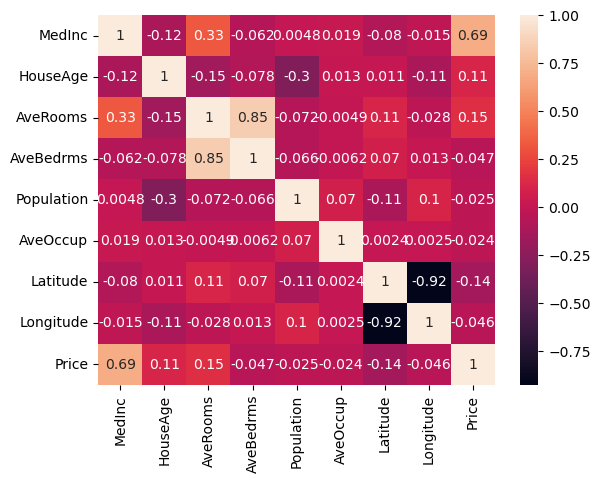

In [31]:
sns.heatmap(df.corr(),annot=True)

Diving dataset into independent and dependent features 

In [34]:
X=df.iloc[:,:-1]

In [35]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [53]:
Y=df[['Price']]

In [54]:
Y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=34)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()

In [63]:
scaler.fit(X_train)

StandardScaler()

In [64]:
X_train=scaler.transform(X_train)

In [65]:
X_test=scaler.transform(X_test)

Model Training

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regressor=LinearRegression()

In [74]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [76]:
regressor.coef_

array([[ 0.81786945,  0.11714961, -0.25939531,  0.30657391, -0.00157808,
        -0.03040039, -0.9022202 , -0.86859841]])

In [77]:
regressor.intercept_

array([2.06749767])

In [79]:
##Prediction
Y_Pred_test=regressor.predict(X_test)

In [81]:
from sklearn.metrics import r2_score

In [83]:
r2_score(Y_test,Y_Pred_test)

0.6235209700945569

In [84]:
import pickle

In [86]:
##storing the model in pickle file
pickle.dump(regressor,open('regressor.pkl','wb'))

In [87]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [89]:
model_regressor=pickle.load(open('regressor.pkl','rb'))

In [90]:
model_regressor.predict(X_test)

array([[1.78950327],
       [1.56766424],
       [2.21526403],
       ...,
       [3.00600981],
       [1.27413348],
       [1.94277409]])

In [91]:
std_scaler=pickle.load(open('scaler.pkl','rb'))

In [92]:
std_scaler.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ -2.27657714,  -2.31503116,  -2.30382633, ...,  -0.48893526,
        -16.98397735,  60.11857852],
       [ -2.0157767 ,  -2.28364114,  -2.12451817, ...,  -0.4814572 ,
        -16.41589598,  59.71904738],
       [ -1.57026458,  -2.37153319,  -1.87862893, ...,  -0.47428782,
        -17.02986084,  60.31334995],
       ...,
       [ -1.64168976,  -2.37781119,  -1.808284  , ...,  -0.47816946,
        -16.81792279,  59.53925837],
       [ -2.44615989,  -2.22086111,  -2.20011382, ...,  -0.46341951,
        -16.14933472,  59.34448694],
       [ -2.42992058,  -2.22713912,  -2.22154348, ...,  -0.47729049,
        -16.9184295 ,  59.82891845]])

In [93]:
model_regressor.predict(std_scaler.transform(X_test))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-37.02118766],
       [-37.30292631],
       [-36.76687695],
       ...,
       [-36.32658903],
       [-37.35416463],
       [-37.0752582 ]])

In [98]:
Y_Pred_test

array([[1.78950327],
       [1.56766424],
       [2.21526403],
       ...,
       [3.00600981],
       [1.27413348],
       [1.94277409]])

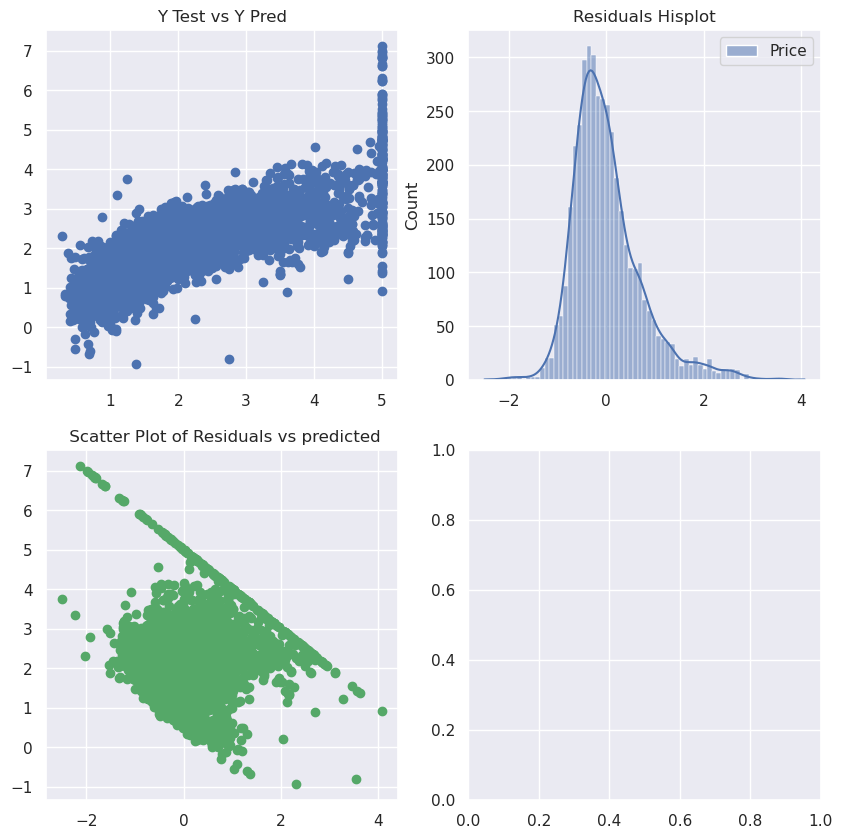

In [134]:
sns.set_theme()
fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0,0].scatter(Y_test,Y_Pred_test)
axes[0,0].set_title('Y Test vs Y Pred')
sns.histplot(Y_test-Y_Pred_test,kde=True,ax=axes[0,1])
axes[0,1].set_title('Residuals Hisplot')
axes[1,0].set_title(' Scatter Plot of Residuals vs predicted')
axes[1,0].scatter((Y_test-Y_Pred_test),Y_Pred_test,color='g')